In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

## Carregando Dados Casos de Sarampo

In [100]:
df1 = pd.read_csv("dados_sus_2018_2022.csv", delimiter=';')
df2 = df1.assign(numberCases = df1['casos confirmados'])
df = df2.drop('casos confirmados', axis=1)
df

,anomes,numberCases
0,201802,21
1,201803,189
2,201804,184
3,201805,544
4,201806,1808
5,201807,3463
6,201808,2211
7,201809,614
8,201810,225
9,201811,53


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
anomes         58 non-null int64
numberCases    58 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


## Carregando Dados Pesquisa Google

In [82]:
from pytrends.request import TrendReq
import pandas as pd
pytrends = TrendReq(hl='pt-PT', tz=360)

years = ['2018', '2019', '2020', '2021', '2022']

dfs = []
for year in years:
    print(year)
    pytrends.build_payload(geo='BR', kw_list=['sarampo'], timeframe=[
        f'{year}-01-01 {year}-12-31'])
    df = pytrends.interest_over_time()
    dfs.append(df)
df_concat = pd.concat(dfs)

2018
2019
2020
2021
2022


In [19]:
df_concat

,sarampo,isPartial
date,,
2018-01-07,2,False
2018-01-14,3,False
2018-01-21,3,False
2018-01-28,2,False
2018-02-04,3,False
...,...,...
2022-11-27,8,False
2022-12-04,8,False
2022-12-11,8,False


In [87]:
df_aux = df_concat.reset_index().drop('isPartial',axis=1).assign(anomes = (df_concat.index.strftime("%Y")+df_concat.index.strftime("%m")).astype(int))
df_aux2 = df_aux.drop('date',axis=1)
df_aux2

,sarampo,anomes
0,2,201801
1,3,201801
2,3,201801
3,2,201801
4,3,201802
...,...,...
255,8,202211
256,9,202212
257,9,202212
258,7,202212


In [57]:
df_gg = df_aux2.groupby('anomes').mean()
df_gg

,sarampo
anomes,
201801,2.50
201802,5.50
201803,10.50
201804,7.80
201805,5.50
201806,6.50
201807,62.80
201808,60.50
201809,13.80


## Juntando as 2 bases

In [68]:
df_f = pd.merge(df, df_gg, on='anomes', how='inner')
df_f

,anomes,numberCases,sarampo
0,201802,21,5.50
1,201803,189,10.50
2,201804,184,7.80
3,201805,544,5.50
4,201806,1808,6.50
5,201807,3463,62.80
6,201808,2211,60.50
7,201809,614,13.80
8,201810,225,8.00
9,201811,53,6.75


## Estatistica Descritiva

In [69]:
df_f.describe()

,anomes,numberCases,sarampo
count,58.000000,58.000000,58.000000
mean,202006.500000,684.431034,26.787069
std,139.940746,1303.144310,24.753257
min,201802.000000,2.000000,2.000000
25%,201904.250000,21.000000,7.000000
50%,202006.500000,70.000000,11.200000
75%,202108.750000,524.000000,49.125000
max,202211.000000,5962.000000,89.750000


<function matplotlib.pyplot.show(*args, **kw)>

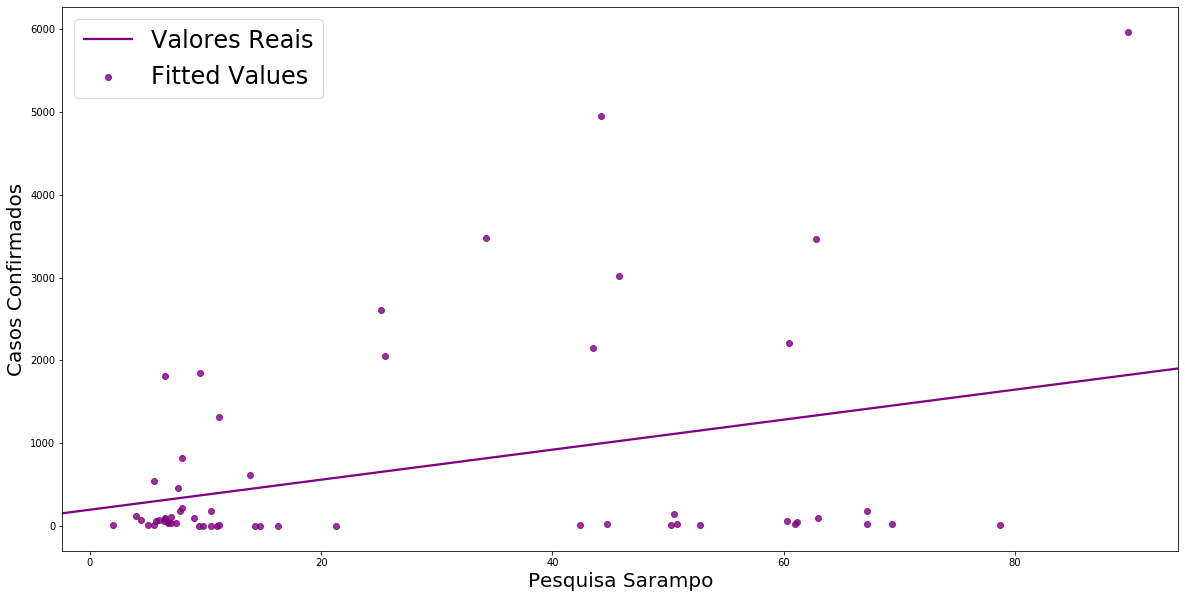

In [70]:
# In[ ]: Gráfico de dispersão

#Regressão linear que melhor se adequa às obeservações: função 'sns.regplot'

plt.figure(figsize=(20,10))
sns.regplot(data=df_f, x='sarampo', y='numberCases', ci=False, color='purple')
plt.xlabel('Pesquisa Sarampo', fontsize=20)
plt.ylabel('Casos Confirmados', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

## Modelo Regressao Linear Simples

In [71]:
# In[ ]: Estimação do modelo de regressão linear simples

#Estimação do modelo
modelo = sm.OLS.from_formula("numberCases ~ sarampo", df_f).fit()

In [72]:
#Observação dos parâmetros resultantes da estimação
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     7.506
Date:                Sun, 28 May 2023   Prob (F-statistic):            0.00824
Time:                        20:46:02   Log-Likelihood:                -494.15
No. Observations:                  58   AIC:                             992.3
Df Residuals:                      56   BIC:                             996.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    199.6224    239.990      0.832      0.409    -281.135     680.380
sarampo       18.0986      6.606      2.740      0.008       4.865      31.332
==============================================================================
Omnibus:                       24.863   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.063
Skew:                           1.555   Prob(JB):                     5.43e-09
Kurtosis:                       5.465   Cond. No.                         53.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
df_f['yhat'] = modelo.fittedvalues
df_f['erro'] = modelo.resid
df_f

,anomes,numberCases,sarampo,yhat,erro
0,201802,21,5.50,299.164771,-278.164771
1,201803,189,10.50,389.657798,-200.657798
2,201804,184,7.80,340.791563,-156.791563
3,201805,544,5.50,299.164771,244.835229
4,201806,1808,6.50,317.263376,1490.736624
5,201807,3463,62.80,1336.214867,2126.785133
6,201808,2211,60.50,1294.588074,916.411926
7,201809,614,13.80,449.383196,164.616804
8,201810,225,8.00,344.411284,-119.411284
9,201811,53,6.75,321.788027,-268.788027


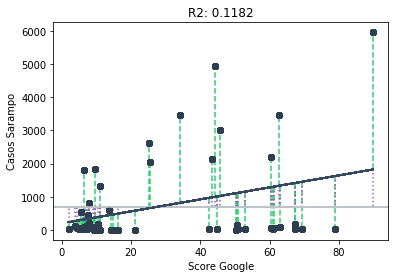

In [74]:
y = df_f['numberCases']
yhat = df_f['yhat']
x = df_f['sarampo']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Score Google")
    plt.ylabel("Casos Sarampo")
plt.show()

In [75]:
df_f[['numberCases','sarampo']].corr()

,numberCases,sarampo
numberCases,1.000000,0.343783
sarampo,0.343783,1.000000


In [76]:
(df_f[['numberCases','sarampo']].corr())**2

,numberCases,sarampo
numberCases,1.000000,0.118187
sarampo,0.118187,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

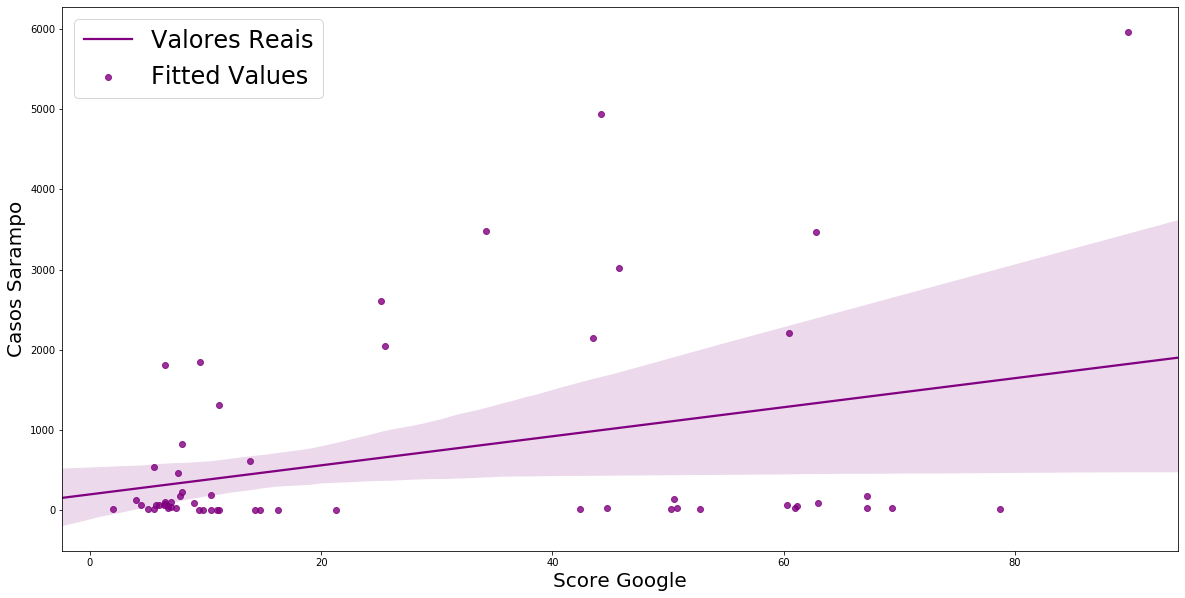

In [78]:
#Plotando o intervalo de confiança de 95%
plt.figure(figsize=(20,10))
sns.regplot(data=df_f, x='sarampo', y='numberCases', ci=95, color='purple')
plt.xlabel('Score Google', fontsize=20)
plt.ylabel('Casos Sarampo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [79]:
#Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

,0,1
Intercept,-281.135222,680.380103
sarampo,4.864715,31.332496


## Modelo Regressao Linear Multipla

In [83]:
from pytrends.request import TrendReq
import pandas as pd
pytrends = TrendReq(hl='pt-PT', tz=360)

years = ['2018', '2019', '2020', '2021', '2022']

dfs = []
for year in years:
    print(year)
    pytrends.build_payload(geo='BR', kw_list=['febre'], timeframe=[
        f'{year}-01-01 {year}-12-31'])
    df = pytrends.interest_over_time()
    dfs.append(df)
df_febre = pd.concat(dfs)

2018
2019
2020
2021
2022


In [84]:
df_febre

,febre,isPartial
date,,
2018-01-07,34,False
2018-01-14,100,False
2018-01-21,61,False
2018-01-28,40,False
2018-02-04,27,False
...,...,...
2022-11-27,40,False
2022-12-04,38,False
2022-12-11,40,False


In [89]:
df_aux = df_febre.reset_index().drop('isPartial',axis=1).assign(anomes = (df_concat.index.strftime("%Y")+df_concat.index.strftime("%m")).astype(int))
df_aux2 = df_aux.drop('date',axis=1)
df_aux2

,febre,anomes
0,34,201801
1,100,201801
2,61,201801
3,40,201801
4,27,201802
...,...,...
255,40,202211
256,38,202212
257,40,202212
258,33,202212


In [90]:
df_gg_febre = df_aux2.groupby('anomes').mean()
df_gg_febre

,febre
anomes,
201801,58.75
201802,23.00
201803,13.25
201804,10.20
201805,8.00
201806,7.25
201807,7.00
201808,6.25
201809,6.60


In [91]:
from pytrends.request import TrendReq
import pandas as pd
pytrends = TrendReq(hl='pt-PT', tz=360)

years = ['2018', '2019', '2020', '2021', '2022']

dfs = []
for year in years:
    print(year)
    pytrends.build_payload(geo='BR', kw_list=['tosse'], timeframe=[
        f'{year}-01-01 {year}-12-31'])
    df = pytrends.interest_over_time()
    dfs.append(df)
df_tosse = pd.concat(dfs)

2018
2019
2020
2021
2022


In [92]:
df_tosse

,tosse,isPartial
date,,
2018-01-07,41,False
2018-01-14,36,False
2018-01-21,37,False
2018-01-28,31,False
2018-02-04,32,False
...,...,...
2022-11-27,35,False
2022-12-04,32,False
2022-12-11,34,False


In [93]:
df_aux = df_tosse.reset_index().drop('isPartial',axis=1).assign(anomes = (df_concat.index.strftime("%Y")+df_concat.index.strftime("%m")).astype(int))
df_aux2 = df_aux.drop('date',axis=1)
df_aux2

,tosse,anomes
0,41,201801
1,36,201801
2,37,201801
3,31,201801
4,32,201802
...,...,...
255,35,202211
256,32,202212
257,34,202212
258,32,202212


In [94]:
df_gg_tosse = df_aux2.groupby('anomes').mean()
df_gg_tosse

,tosse
anomes,
201801,36.25
201802,38.50
201803,53.25
201804,72.20
201805,84.50
201806,90.00
201807,86.00
201808,70.00
201809,70.00


In [98]:
df_join1 = pd.merge(df_gg, df_gg_febre, on='anomes', how='inner')
df_gg_mult = pd.merge(df_join1, df_gg_tosse, on='anomes', how='inner')
df_gg_mult

,sarampo,febre,tosse
anomes,,,
201801,2.50,58.75,36.25
201802,5.50,23.00,38.50
201803,10.50,13.25,53.25
201804,7.80,10.20,72.20
201805,5.50,8.00,84.50
201806,6.50,7.25,90.00
201807,62.80,7.00,86.00
201808,60.50,6.25,70.00
201809,13.80,6.60,70.00


## Juntando as 2 bases

In [102]:
df_f = pd.merge(df, df_gg_mult, on='anomes', how='inner')
df_f

,anomes,numberCases,sarampo,febre,tosse
0,201802,21,5.50,23.00,38.50
1,201803,189,10.50,13.25,53.25
2,201804,184,7.80,10.20,72.20
3,201805,544,5.50,8.00,84.50
4,201806,1808,6.50,7.25,90.00
5,201807,3463,62.80,7.00,86.00
6,201808,2211,60.50,6.25,70.00
7,201809,614,13.80,6.60,70.00
8,201810,225,8.00,6.50,56.00
9,201811,53,6.75,6.75,56.75


In [104]:
#Características das variáveis do dataset
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 5 columns):
anomes         58 non-null int64
numberCases    58 non-null int64
sarampo        58 non-null float64
febre          58 non-null float64
tosse          58 non-null float64
dtypes: float64(3), int64(2)
memory usage: 2.7 KB


In [105]:
#Estatísticas univariadas
df_f.describe()

,anomes,numberCases,sarampo,febre,tosse
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,202006.500000,684.431034,26.787069,43.393966,49.040517
std,139.940746,1303.144310,24.753257,23.899960,21.008184
min,201802.000000,2.000000,2.000000,6.250000,21.000000
25%,201904.250000,21.000000,7.000000,32.375000,30.875000
50%,202006.500000,70.000000,11.200000,40.625000,43.500000
75%,202108.750000,524.000000,49.125000,65.937500,68.350000
max,202211.000000,5962.000000,89.750000,94.250000,90.000000


In [106]:
# In[ ]: Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_f['sarampo'], 
    y=df_f['febre'], 
    z=df_f['numberCases'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='Score Sarampo',
                        yaxis_title='Score Febre',
                        zaxis_title='Casos Sarampo'))
plot_figure.show()

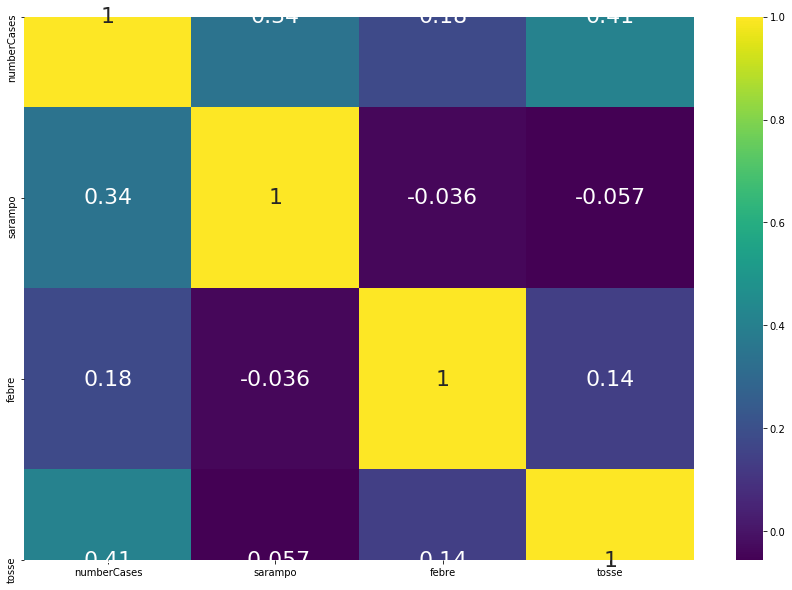

In [108]:
# In[ ]: Matriz de correlações

df_corr = df_f.drop('anomes',axis=1)
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1080x720 with 0 Axes>

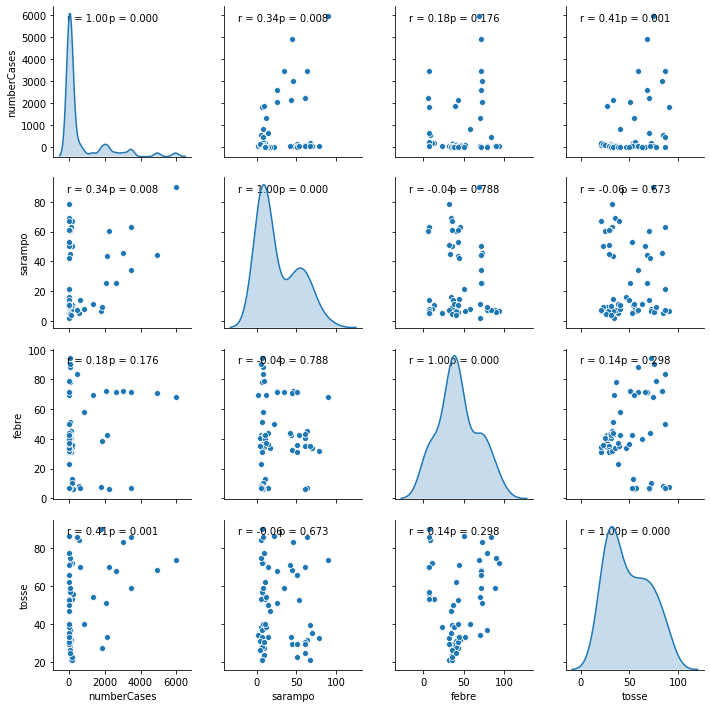

In [109]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_corr, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [117]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult = sm.OLS.from_formula("numberCases ~ sarampo + febre + tosse", df_f).fit()

In [118]:
#Parâmetros do modelo
modelo_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     8.489
Date:                Sun, 28 May 2023   Prob (F-statistic):           0.000103
Time:                        21:51:19   Log-Likelihood:                -486.60
No. Observations:                  58   AIC:                             981.2
Df Residuals:                      54   BIC:                             989.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1413.1911    468.852     -3.014      0.004   -2353.184    -473.199
sarampo       19.5835      5.918      3.309      0.002       7.719      31.448
febre          7.4477      6.179      1.205      0.233      -4.940      19.836
tosse         25.4861      7.036      3.622      0.001      11.379      39.593
==============================================================================
Omnibus:                       12.181   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.675
Skew:                           0.977   Prob(JB):                      0.00177
Kurtosis:                       4.194   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_mult.conf_int(alpha=0.05)

,0,1
Intercept,-2353.183508,-473.198718
sarampo,7.719467,31.447577
febre,-4.940460,19.835935
tosse,11.379178,39.592965


In [120]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult = stepwise(modelo_mult, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 numberCases ~ sarampo + febre + tosse

 Discarding atribute "febre" with p-value equal to 0.23333294947779593 

Estimating model...: 
 numberCases ~ sarampo + tosse

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'febre', 'p-value': 0.23333294947779593}

 Model after stepwise process...: 
 numberCases ~ sarampo + tosse 

                            OLS Regression Results                            
Dep. Variable:            numberCases   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sun, 28 May 2023   Prob (F-statistic):           5.05e-05
Time:                        21:52:51   Log-Likelihood:                -487.37
No. Observations:                  58   AIC:                             980.7
Df Residuals:       

In [121]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9088990929132069,
 'statistics z': 3.1951624121776527,
 'p-value': 0.0006987608597489179}

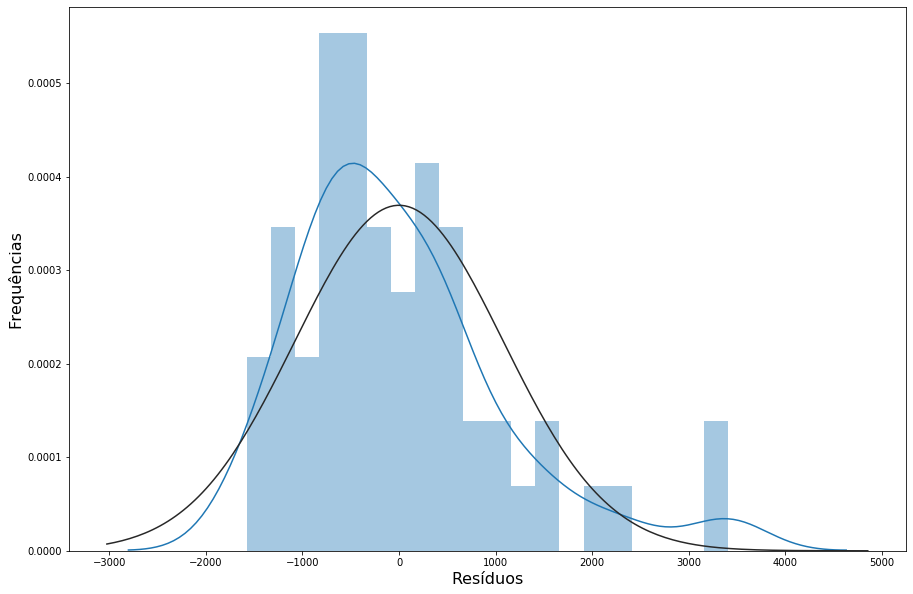

In [122]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [123]:
summary_col([modelo, modelo_step_mult],
            model_names=["SIMPLES","MULTIPLA"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA
Intercept,199.6224,-1141.6463***
,(239.9900),(412.8680)
sarampo,18.0986***,19.3799***
,(6.6062),(5.9395)
tosse,,26.6504***
,,(6.9983)
N,58,58


In [124]:
df_f['yhat_simples'] = modelo.fittedvalues
df_f['yhat_step_mult'] = modelo_step_mult.fittedvalues

In [125]:
df_f

,anomes,numberCases,sarampo,febre,tosse,yhat_simples,yhat_step_mult
0,201802,21,5.50,23.00,38.50,299.164771,-9.017928
1,201803,189,10.50,13.25,53.25,389.657798,480.974265
2,201804,184,7.80,10.20,72.20,340.791563,933.673118
3,201805,544,5.50,8.00,84.50,299.164771,1216.898971
4,201806,1808,6.50,7.25,90.00,317.263376,1382.855846
5,201807,3463,62.80,7.00,86.00,1336.214867,2367.340202
6,201808,2211,60.50,6.25,70.00,1294.588074,1896.360658
7,201809,614,13.80,6.60,70.00,449.383196,991.321439
8,201810,225,8.00,6.50,56.00,344.411284,505.813138
9,201811,53,6.75,6.75,56.75,321.788027,501.576095


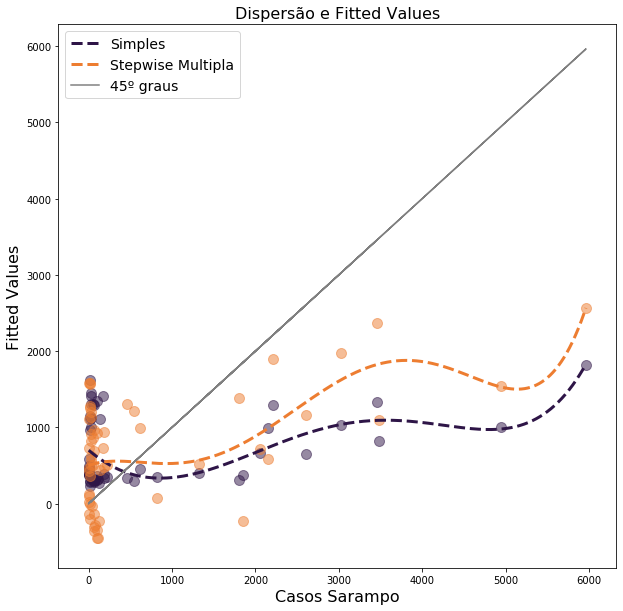

In [126]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_f['numberCases']
ydata_simp = df_f['yhat_simples']
ydata_mult = df_f['yhat_step_mult']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_simp)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Simples','Stepwise Multipla','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [130]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_f[['sarampo','tosse']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,8.050267,0.124219
sarampo,1.003219,0.996791
tosse,1.003219,0.996791


In [132]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade


# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_mult)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 24.44134664952258
p-value: 7.952551790072926e-07


(24.44134664952258, 7.952551790072926e-07)

In [ ]:
#Usar modelo_step_mult

In [133]:
# In[ ]: Gráfico 3D com scatter e fitted values resultantes do modelo

trace = go.Scatter3d(
    x=df_f['sarampo'], 
    y=df_f['tosse'], 
    z=df_f['numberCases'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    xaxis_title='X AXIS TITLE',
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_f['sarampo'], 
                    y=df_f['tosse'], 
                    z=df_f['yhat_step_mult'], 
                    opacity=0.5,
                    color='pink'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='Score Sarampo',
                        yaxis_title='Score Tosse',
                        zaxis_title='Casos Sarampo'))
plot_figure.show()

In [ ]:
#TCC
#Como foi feito o modelo
#1. Selecao de variavies (sarampo e sintomas)
#2. Teste F p<0.05
#3. Teste t por Beta p<0.05
#4. Stepwise (remove vars)
#5. Teste normalidade dos erros p<0.05
#6. Multicolinearidade Tolerance ~ 1
#7. Hetrocedasticidade p<0.05 (ruim)

#Discussao: eh possivel um modelo para prever sarampo, mas, conforme visto pelo teste de Heterocedasticidade, muitas variavieis
#foram deixadas de fora, sendo necessario buscar mais variaveis (mais sintomas + dados de vacina e sociodemograficos)